Iteration 0/1000
Iteration 100/1000
Iteration 200/1000
Iteration 300/1000
Iteration 400/1000
Iteration 500/1000
Iteration 600/1000
Iteration 700/1000
Iteration 800/1000
Iteration 900/1000
Execution time: 47.1153450012207 seconds


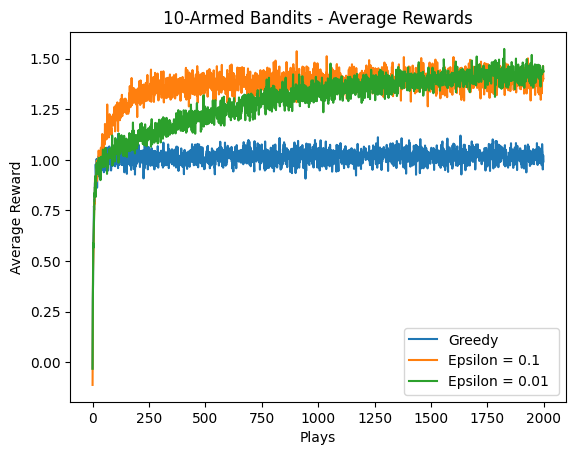

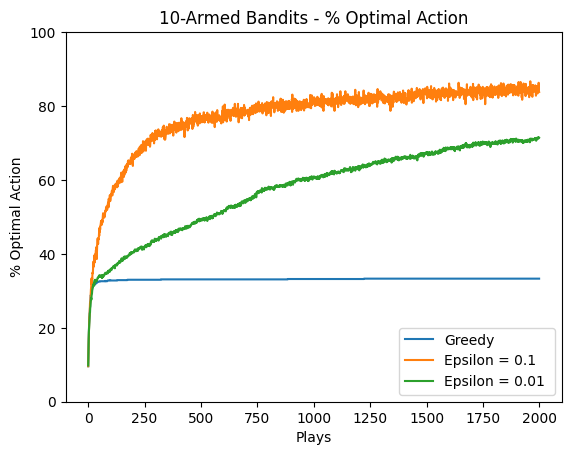

In [9]:
import time
import numpy as np
import matplotlib.pyplot as plt


class Environment:
    """
    This is what the bandits interact with. It contains both the possible rewards and the optimal answer.
    It also keeps track of the bandit's action, the reward it gave, and whether it was optimal.
    """
    def __init__(self) -> None:
        """
        Initialize tracking arrays and reset all bandits.
        """        
        self.rewardArray   = np.random.normal(mean, stdDev, numArms)
        self.optimalAction = np.argmax(self.rewardArray)
        
        for bandit in bandits: bandit.reset()        

    
    def play(self, play: int) -> None:
        """
        For every bandit, we get its choice and choose an appropriate randomish reward.
        We then update optimalArr and scoreArr based on the bandit's action and the reward given, respectively.
        """
        for banditIDX, bandit in enumerate(bandits):
            banditAction = bandit.choose()
            wasOptimal   = (banditAction == self.optimalAction)
         
            baseReward     = self.rewardArray[banditAction]
            gaussianReward = np.random.normal(baseReward, scale=1)
                
            optimalArr[play, banditIDX] += wasOptimal
            scoreArr[play, banditIDX]   += gaussianReward
            
            bandit.observe(gaussianReward)



class Bandit:
    """
    I'll fill in this docstring later, I'm going to bed
    """
    def __init__(self, epsilon: float, defaultValue: int=0) -> None:
        self.epsilon      = epsilon
        self.defaultValue = defaultValue
        self.action       = None

        self.reset()

    
    def __str__(self) -> str:
        """Choose an appropriate string representaion based on the bandit type"""
        optimistic = "" if not self.defaultValue else "(Optimistic)"
        if not self.epsilon: return "Greedy"
        return f"Epsilon = {self.epsilon} {optimistic}"

    
    def reset(self) -> None:
        """Reset all arrays needed to calculate Action-Value."""
        self.rewardSum      = np.zeros(numArms)
        self.actionCount    = np.zeros(numArms)

        self.actionValueArr = np.full(numArms, self.defaultValue, dtype=np.float64)

    
    def choose(self) -> int:
        """
        Get a random number in the range 0.0-1.0. If it's above our epsilon threshold,
        We exploit and pick the greedy option. Otherwise, we explore and pick a random option.
        (NOTE: Instead of returning the value directly, we save it in self.action to use later).
        """
        if np.random.random() > self.epsilon:
            self.action = np.argmax(self.actionValueArr)
        else:
            self.action = np.random.choice(numArms)
        
        return self.action

    
    def observe(self, reward: float) -> None:
        """
        After getting some reward, we update our estimates for the action we took
        by taking the average of the total reward for that action over however many times we've chosen that action.
        (After we update it with our observation of course)
        """
        self.actionCount[self.action]   += 1
        self.rewardSum[self.action]     += reward

        rewardAvg = self.rewardSum[self.action] / self.actionCount[self.action]
        self.actionValueArr[self.action] = rewardAvg



if __name__ == "__main__":
    # Begin tracking the execution time
    startTime = time.time()

    # Initialize essential variables
    numArms    = 10
    mean       = 0
    stdDev     = 1
    iterations = 1000
    plays      = 2000
    
    bandits = [
        Bandit(0),                     # Greedy
        Bandit(0.1),                   # Cautious
        Bandit(0.01),                  # Paranoid
        #Bandit(0.1, defaultValue=1),   # Cautiously Optimistic
        #Bandit(0.01, defaultValue=1),  # Cautiously Paranoid
        #Bandit(0.05, defaultValue=0.5) # Balanced
    ]
    
    scoreArr   = np.zeros((plays, len(bandits)))
    optimalArr = np.zeros((plays, len(bandits)))

    # Begin main learning loop
    for iteration in range(iterations):
        env = Environment()
        
        if iteration % 100 == 0:
            print(f"Iteration {iteration}/{iterations}")
        
        for play in range(plays):
            env.play(play)                               
    
    avgScores  = scoreArr   / iterations
    avgOptimal = optimalArr / iterations
      
################################################################
## STATS TIME! ##
    
    print(f"Execution time: {time.time()-startTime} seconds")  

    # Average Reward Plot
    plt.title("10-Armed Bandits - Average Rewards")
    plt.plot(avgScores)
    plt.ylabel('Average Reward')
    plt.xlabel('Plays')
    plt.legend(bandits)
    plt.show()

    # Optimal Action % Plot
    plt.title("10-Armed Bandits - % Optimal Action")
    plt.plot(avgOptimal * 100)
    plt.ylim(0, 100)
    plt.ylabel('% Optimal Action')
    plt.xlabel('Plays')
    plt.legend(bandits)
    plt.show()
